<h5>Read data</h5>

In [139]:
library(readxl)
data <- read_excel("data.xls")

# first five rows
head(data, 5)

ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,19,182,2,0,0,0,1,0,2523
2,0,33,155,3,0,0,0,0,3,2551
3,0,20,105,1,1,0,0,0,1,2557
4,0,21,108,1,1,0,0,1,2,2594
5,0,18,107,1,1,0,0,1,0,2600


# Task 1

In [140]:
# Need to establish a relationship between Age of Mother in years and Race
age_freq <- as.data.frame(table(data$AGE))
colnames(age_freq) <- c("AGE", "RaceFreq")

# view table first five rows
head(age_freq, 5)

,AGE,RaceFreq
,<fct>,<int>
1,14,9
2,15,9
3,16,22
4,17,37
5,18,33


<h5>Graphing</h5>

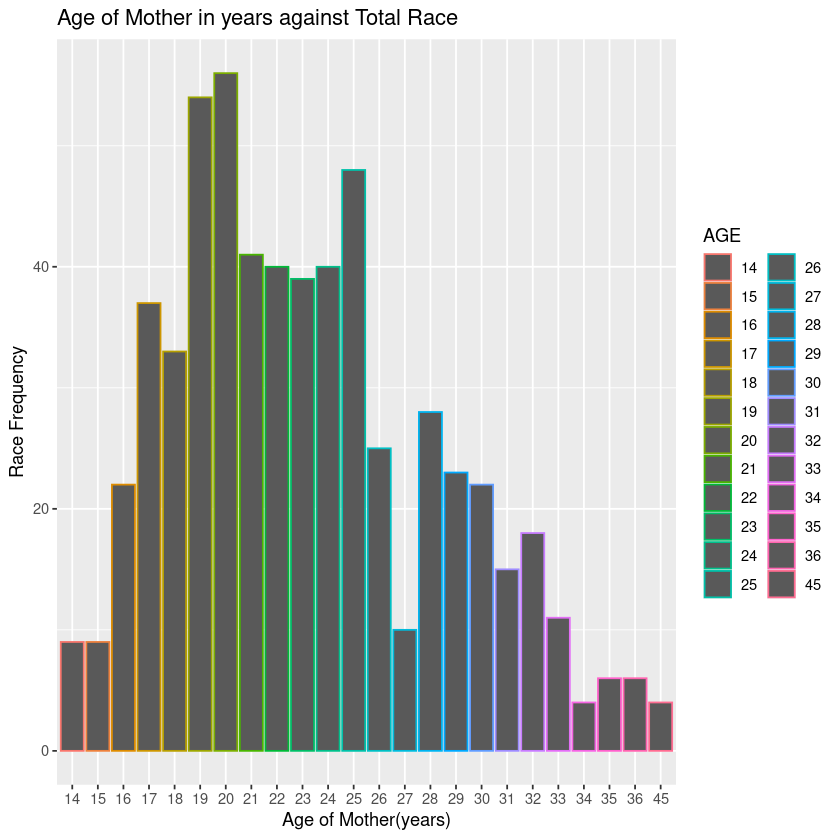

In [141]:
# Line graph of frequency (y) against age(x)
library(ggplot2)

# Create a column graph of AGE gainst Frequency
ggplot(age_freq, aes(x = AGE, y = RaceFreq, color = AGE)) +
  geom_col() + ggtitle("Age of Mother in years against Total Race") +
  labs(x = "Age of Mother(years)", y = "Race Frequency")

<h6>Comments on the results</h6>
<small><strong>"</strong>Observe and the graphs' nature and say something about what you see.<strong>"</strong></small>

NB: You can choose to draw age against a specific race to hav a greater scope to analyse

# Task 2 a)

In [142]:
library(dplyr)

analysis <- data %>%
  group_by(RACE) %>%
  summarize(mean = mean(BWT), sd = sd(BWT))

# where 1 -White, 2 - Black and 3 -Other
analysis

RACE,mean,sd
<dbl>,<dbl>,<dbl>
1,3080.358,749.0213
2,2685.912,642.0547
3,2749.674,733.5639




<h5>Comments on the Results</h5>

<small>Basing on Mean</small>

*Other Race Babies are more likely to die than Black Babies than other White Babies in that order, since from the background information we are told that babies with less weight usually die earlier than heavier ones. And the mean weights BWT show that

*White Babies (3080.358) > Black Babies (2685.912) > Other Race Babies (2749.674)

# Task 2 b)

In [143]:
library(dplyr)

bwt_white <- data %>%
  filter(RACE == 1) %>%
  select(BWT)

bwt_black <- data %>%
  filter(RACE == 2) %>%
  select(BWT)

bwt_other <- data %>%
  filter(RACE == 3) %>%
  select(BWT)

In [144]:
## COMPARISONS in THE RACES
# Between White Race and Black Race basing on the BWT (WB)
results1 <- t.test(bwt_white, bwt_black)
paste("White Race and Black Race")
paste("===========================")
paste("Standard Error is =>", results1$stderr)
paste("Confidence Interval =>", results1$conf.int[1], "up to", results1$conf.int[2])
paste("P-Value is =>", results1$p.value)

[1] "White Race and Black Race"

[1] "==========================="

[1] "Standard Error is => 83.7296367613615"

[1] "Confidence Interval => 228.921474624525 up to 559.968757163554"

[1] "P-Value is => 5.83164557610555e-06"

In [145]:
# Between White Race and Other Race basing on the BWT (WO)
results2 <- t.test(bwt_white, bwt_other)
paste("White Race and Other Race")
paste("===========================")
paste("Standard Error is =>", results2$stderr)
paste("Confidence Interval =>", results2$conf.int[1], "up to", results2$conf.int[2])
paste("P-Value is =>", results2$p.value)

[1] "White Race and Other Race"

[1] "==========================="

[1] "Standard Error is => 65.7734525860129"

[1] "Confidence Interval => 201.439191492672 up to 459.927416442196"

[1] "P-Value is => 7.05848336257112e-07"

In [146]:
# Between Black Race and Other Race basing on the BWT (BO)
results3 <- t.test(bwt_black, bwt_other)
paste("Black Race and Other Race")
paste("===========================")
paste("Standard Error is =>", results3$stderr)
paste("Confidence Interval =>", results3$conf.int[1], "up to", results3$conf.int[2])
paste("P-Value is =>", results3$p.value)

[1] "Black Race and Other Race"

[1] "==========================="

[1] "Standard Error is => 87.300341041151"

[1] "Confidence Interval => -236.17558030463 up to 108.651956451419"

[1] "P-Value is => 0.466233698748352"

# Task 3 a)

In [162]:
ht_smoke <- as.data.frame(table(data['SMOKE'],data['HT']))
colnames(ht_smoke) <- c("Smoking","Hypertension","Individuals")

ht_smoke['Percent'] <- ht_smoke['Individuals'] / sum(ht_smoke['Individuals']) * 100
paste("There are ", sum(ht_smoke['Individuals']), " Individuals")

# where 1 -Yes and 0 is No
ht_smoke

[1] "There are  600  Individuals"

Smoking,Hypertension,Individuals,Percent
<fct>,<fct>,<int>,<dbl>
0,0,342,57.000000
1,0,218,36.333333
0,1,23,3.833333
1,1,17,2.833333


<h4>Comments on the relationship btn Smoking and HyperTension</h4>
We see that for a person not smoking there's 57% chance that that individual won't suffer hypertension